In [174]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [175]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
## 图像显示中文的问题
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
import seaborn as sns
sns.set(font= "Kaiti",style="ticks",font_scale=1.4)
import pandas as pd
pd.set_option("max_colwidth", 200)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,label_binarize
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
## 忽略提醒
import warnings
warnings.filterwarnings("ignore")

In [176]:
df = pd.read_csv('./数据集.csv',encoding="gbk")
df.head()

,Filename,length,width,height,length/width,height/length,width/height,AvgCurvature,Ellipticity,Sphericity,lable
0,DL1,4.065803,6.727154,3.417684,0.604387,0.840593,1.968337,0.154585,7.331243,0.796888,Vignadula_atrata
1,DL12,4.417225,5.595963,2.852398,0.789359,0.645744,1.961845,0.169485,7.298741,0.774361,Vignadula_atrata
2,DL13,2.351955,5.968850,4.025392,0.394038,1.711509,1.482800,0.189655,7.293684,0.715899,Vignadula_atrata
3,DL15,2.650643,5.889151,4.486869,0.450089,1.692747,1.312530,0.132264,7.297146,0.772081,Vignadula_atrata
4,DL17,3.422956,5.102332,2.307826,0.670861,0.674220,2.210882,0.164156,7.013591,0.773911,Vignadula_atrata


In [177]:
label = LabelEncoder()
df["lable"] = label.fit_transform(df["lable"])

In [178]:
df.columns

Index(['Filename', 'length', 'width', 'height', 'length/width',
       'height/length', 'width/height', 'AvgCurvature', 'Ellipticity',
       'Sphericity', 'lable'],
      dtype='object')

In [179]:
X = df[["length", "width", "height", "length/width", "height/length", "width/height","AvgCurvature","Sphericity","Ellipticity"]] .values  #.astype(float)
y = df['lable'].values

In [180]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [385]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (102, 9) (102,)
Test set: (44, 9) (44,)


In [386]:
from sklearn.neighbors import KNeighborsClassifier
k = 8
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=8)

In [387]:
yhat = neigh.predict(X_test)
yhat

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [388]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7156862745098039
Test set Accuracy:  0.7045454545454546


In [389]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

In [390]:
y_scores = neigh.predict_proba(X_test)[:, 1]
fpr_Nb, tpr_Nb, _ = roc_curve(y_test, y_scores)
aucval = auc(fpr_Nb, tpr_Nb)

In [391]:
aucval

0.6321839080459771

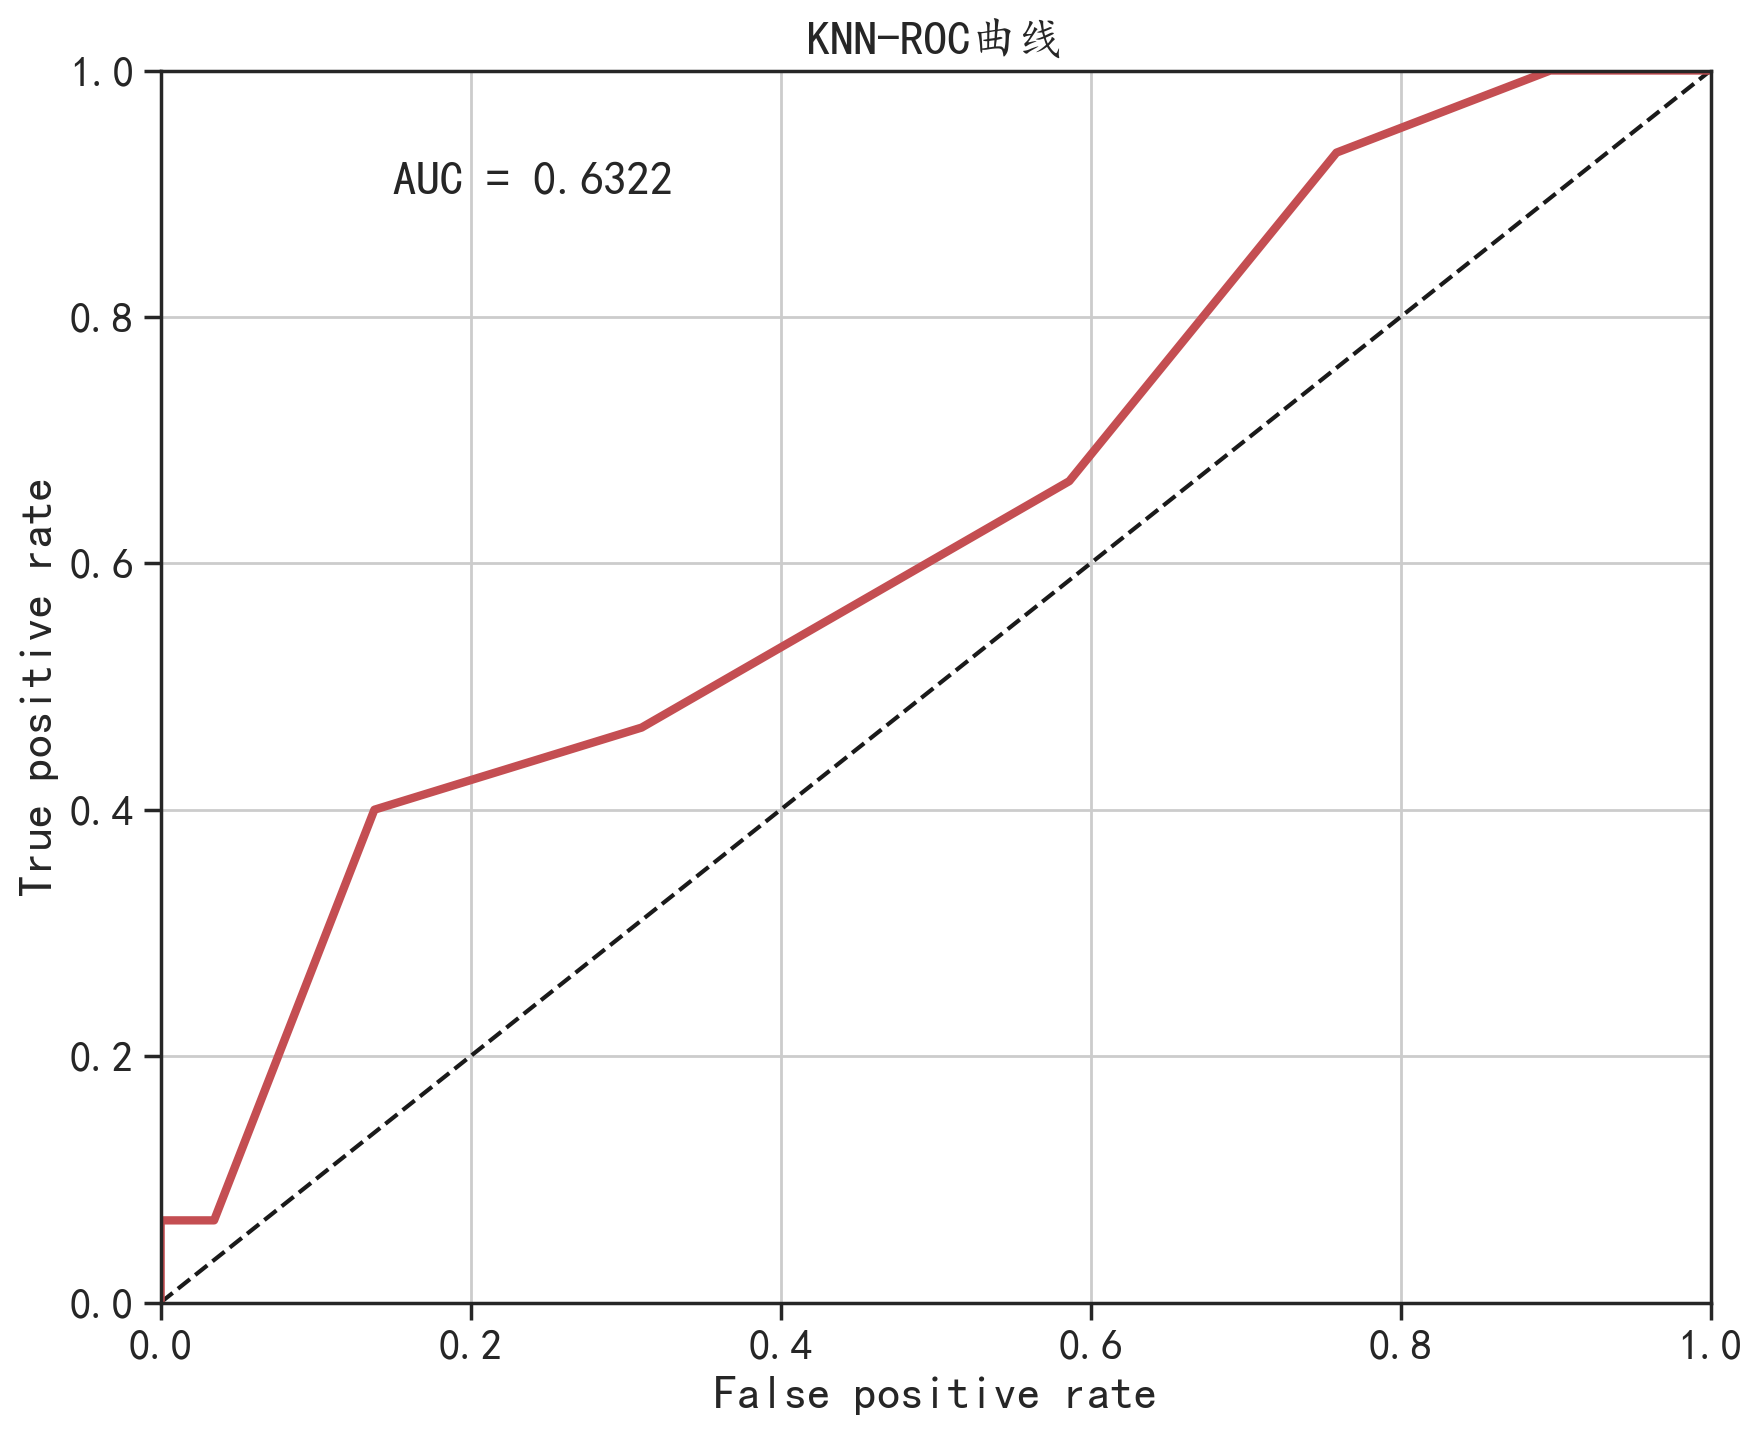

In [392]:
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_Nb, tpr_Nb,"r",linewidth = 3)
plt.grid()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("KNN-ROC曲线")
plt.text(0.15,0.9,"AUC = "+str(round(aucval,4)))
plt.show()

In [309]:
fpr_Nb, tpr_Nb

(array([0. , 0.2, 0.4, 1. ]),
 array([0.        , 0.        , 0.33333333, 1.        ]))

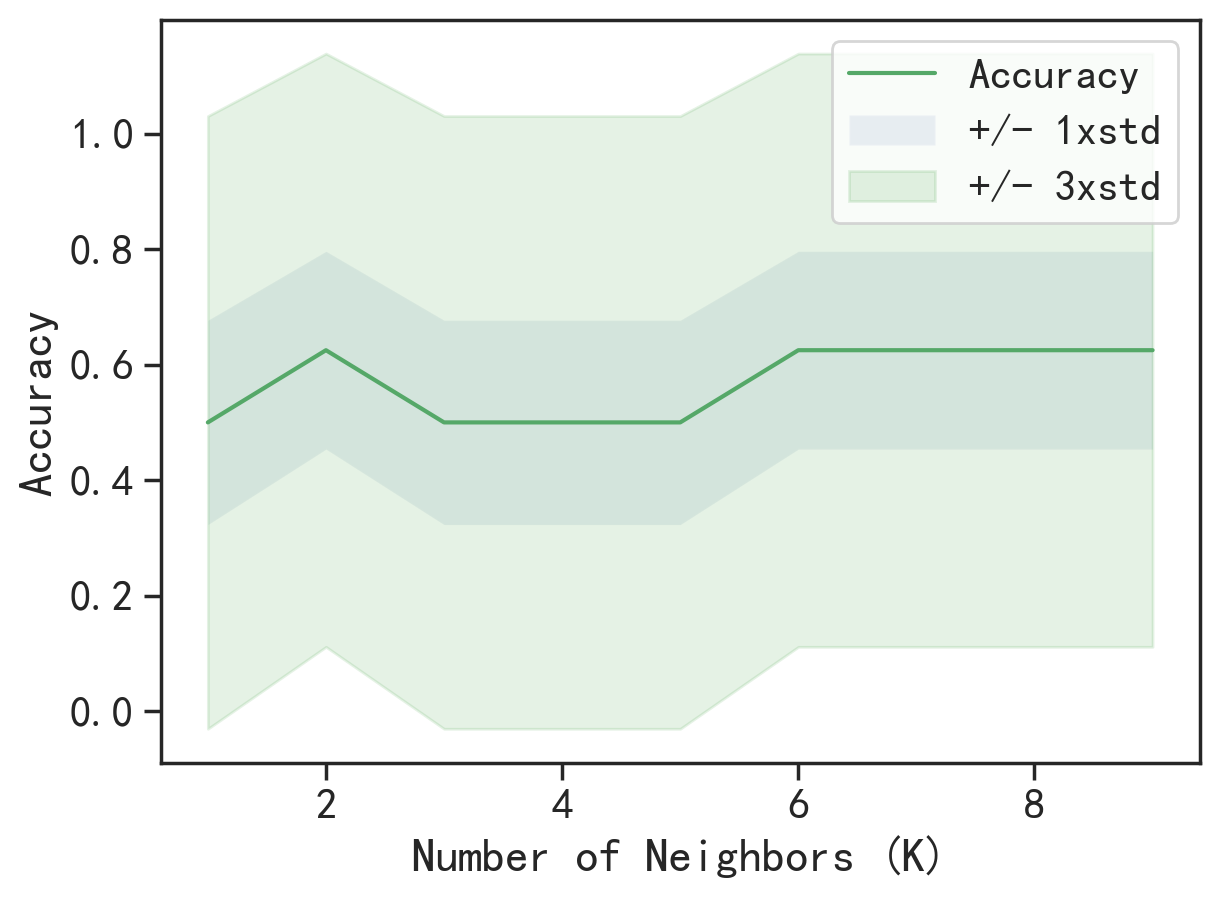

In [310]:
#计算 KNN 对不同 k 值的准确度
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
#绘制不同k的knn模型的准确性的图
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [312]:
mean_acc

array([0.5  , 0.625, 0.5  , 0.5  , 0.5  , 0.625, 0.625, 0.625, 0.625])